In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
df=pd.read_csv('mushrooms.csv')
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [4]:
df["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

the class has only definitely edible and definitely poisonous

the definitely poisonous also has unknown edibility and not recommended

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


the dataset has 23 columns

all the columns have categorical data

Features are everything other than class

label is class

to see the mean, median and other stats we need to perform encoding

In [6]:
pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

one column has only 1 value in it i.e 'p', so not contributing

Since its of no value, we will drop the column

In [7]:
df=df.drop(["veil-type"],axis=1)

In [8]:
#checking missing value
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No null value present

# Encoding the categorical data

In [9]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [10]:
data = df.apply(lab_enc.fit_transform)
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,2,7,7,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,2,7,7,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,2,7,7,2,1,4,2,3,3


In [11]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


23 columns present in the dataframe

Not much difference between mean and median, so less outliers

# Checking for class imbalance

In [12]:
data["class"].value_counts()

0    4208
1    3916
Name: class, dtype: int64

Class column has two values where one has 4208 values and the other 3916

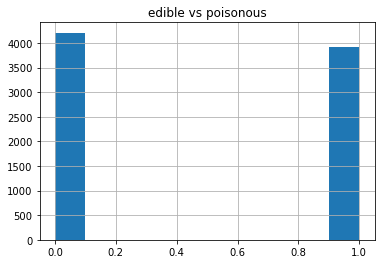

In [13]:
data["class"].hist(grid=True)
plt.title("edible vs poisonous")
plt.show()

class is balanced as both of them are almost equal

# Checking multicollinearity

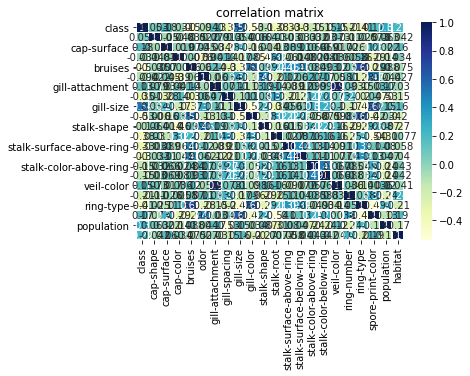

In [14]:
data_corr=data.corr()
sns.heatmap(data_corr,linewidths=.4,center=None,vmin=None,vmax=None,annot= True,cmap="YlGnBu")
plt.title("correlation matrix")
plt.show()

1(dark color) is perfectly correlated

90% correlation is between:viel-color and gill-attachment

so we have to drop wither viel-color or gill attachment

Viel color has higher relation with gill atttachment, so dropping gill attachment

In [15]:
df=df.drop(["gill-attachment"],axis=1)

# understanding the relationship between independent variable with label

In [16]:
data_corr=data.corr()
data_corr["class"].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
Name: class, dtype: float64

correlation has range between 0 to 1

any correlation falling nearer to zero is the least important

doesnt matter positive or negative

Hence highest correlation here with label is of gill size,gill-color and bruises (50%)

Then comes ring-type,stalk-root,gill-spacing,stalk-surface-above-ring

# Using density plot finding data distribution among columns

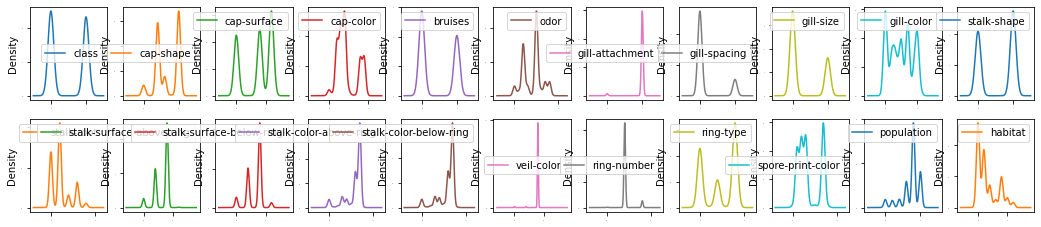

In [17]:
data.plot(kind='density', subplots=True, layout=(6,11), sharex=False, fontsize=1, figsize=(18,12))
plt.show()

 # pairwise comparison

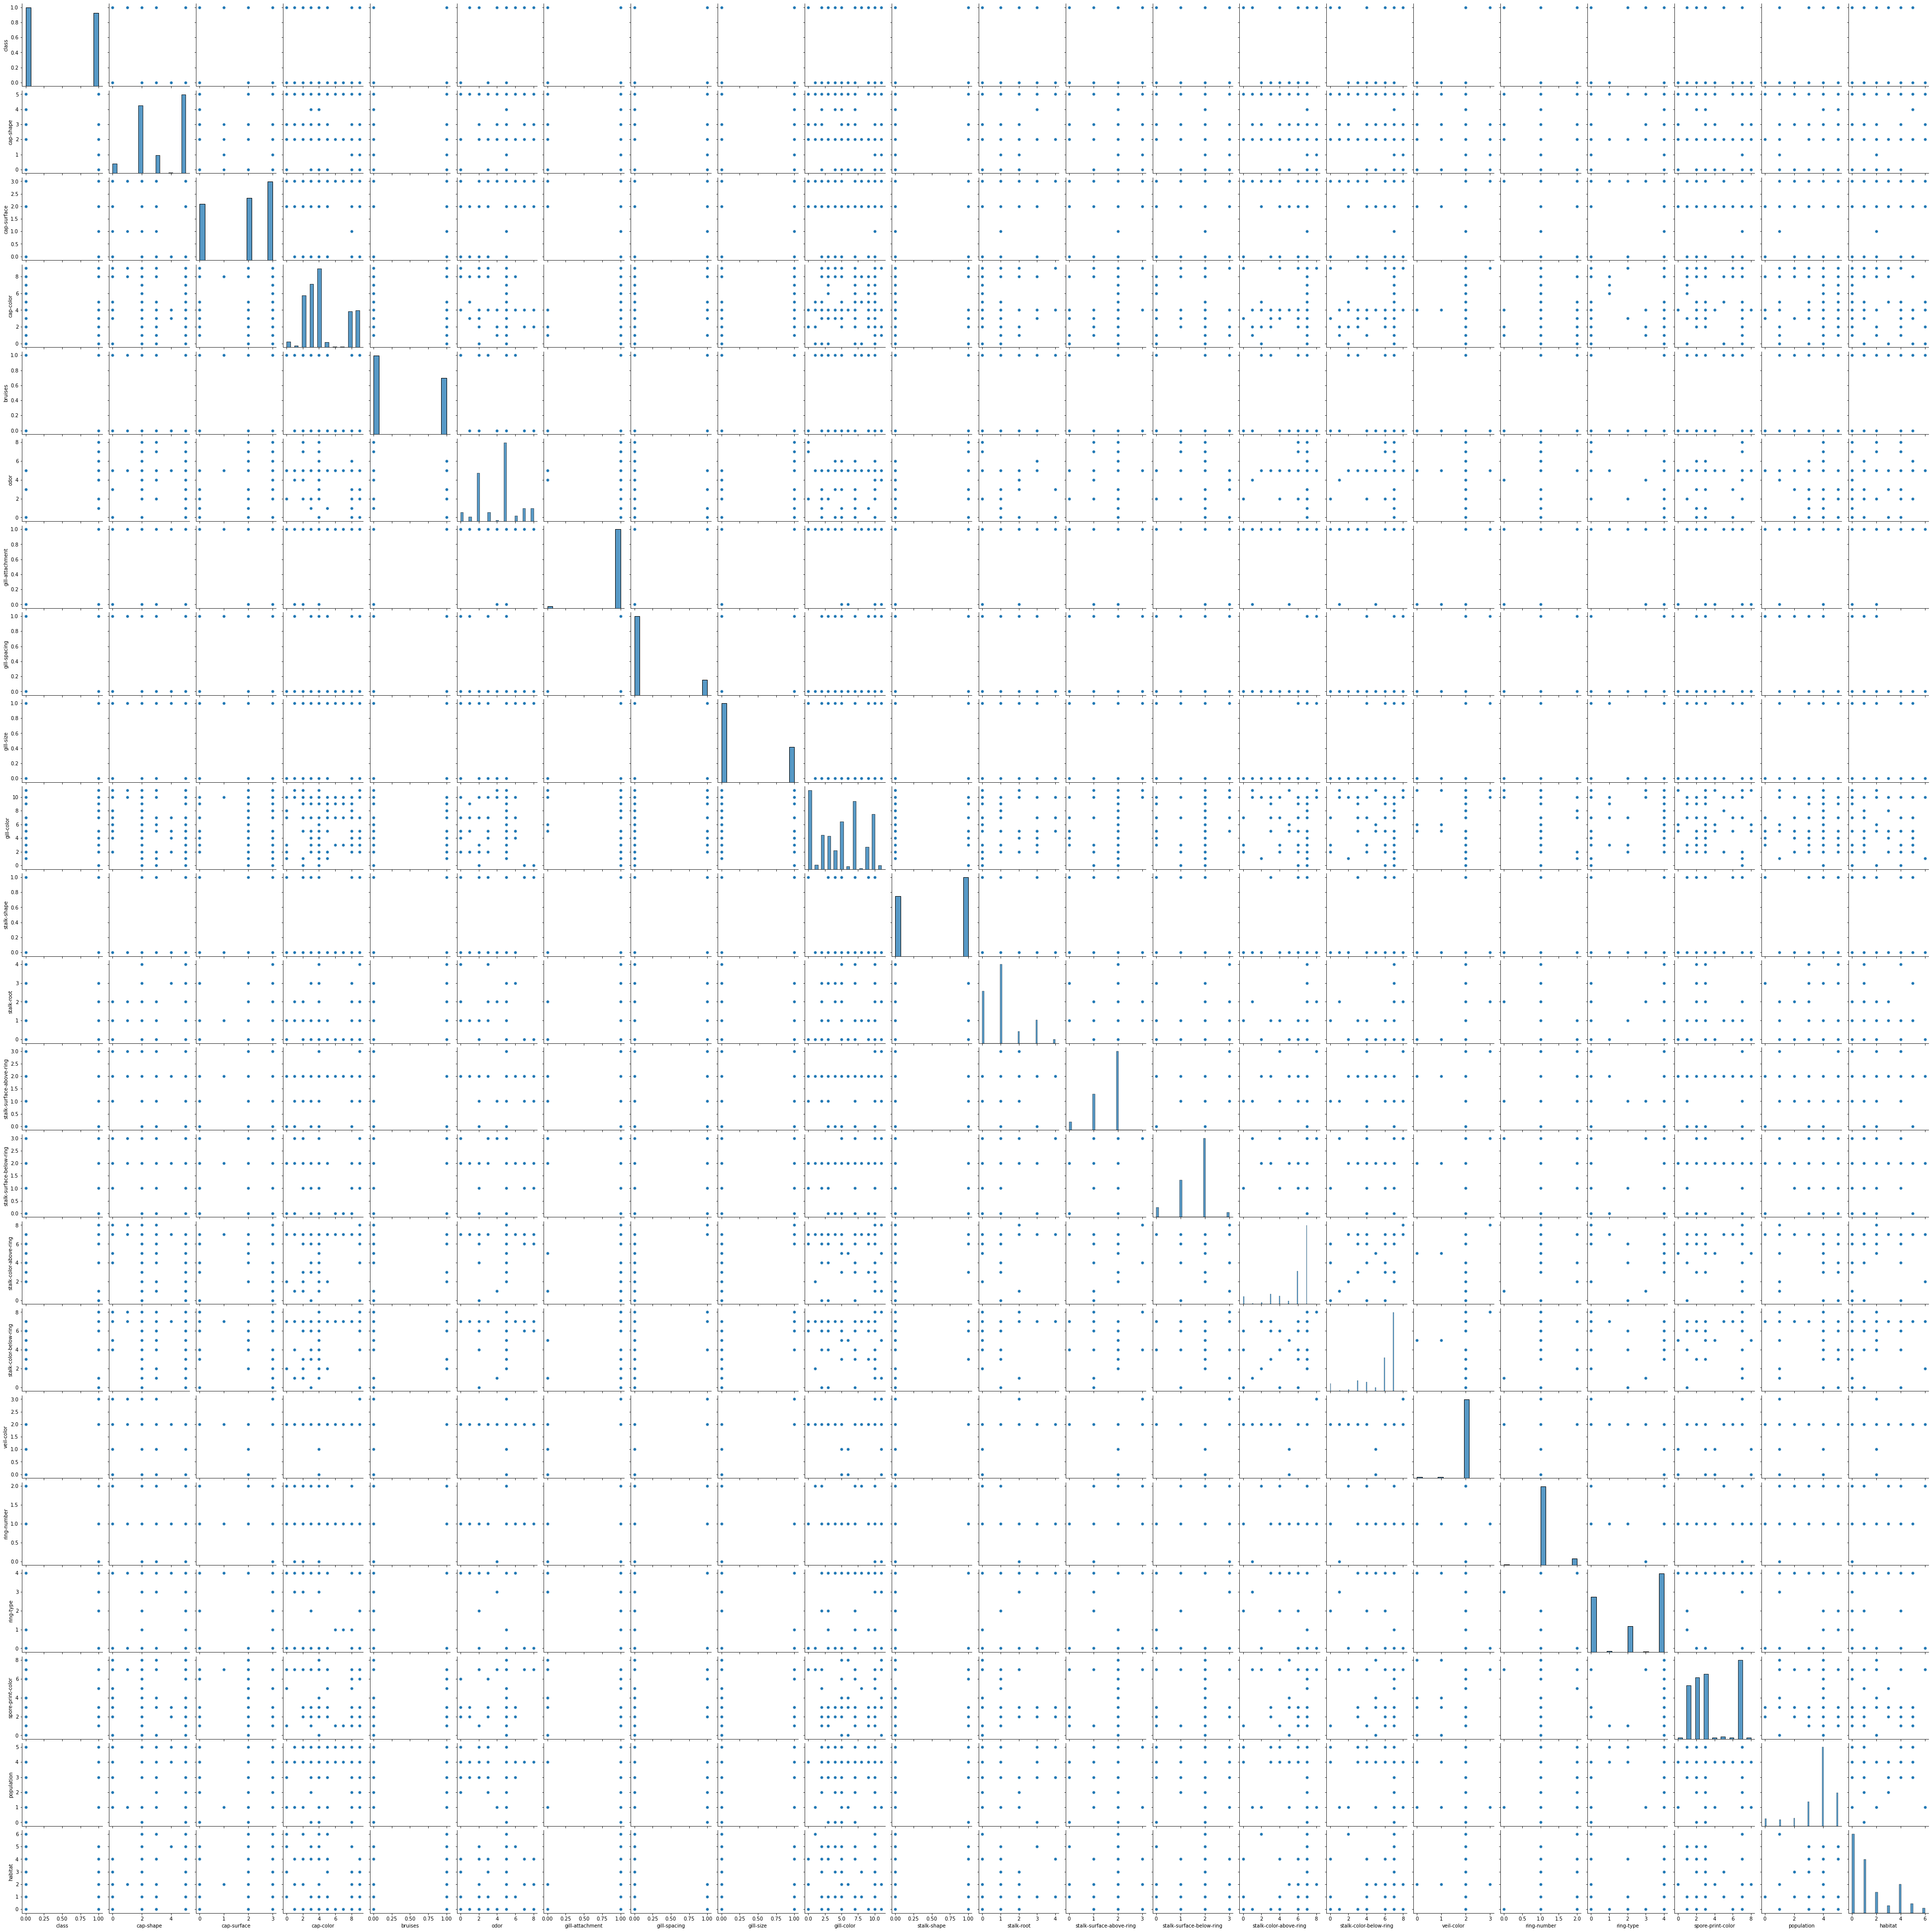

In [18]:
sns.pairplot(data)
plt.show()

# Plotting relationship between label and features/FEATURE SELECTION

In [19]:
x=data.drop("class",axis=1)
y=data["class"]

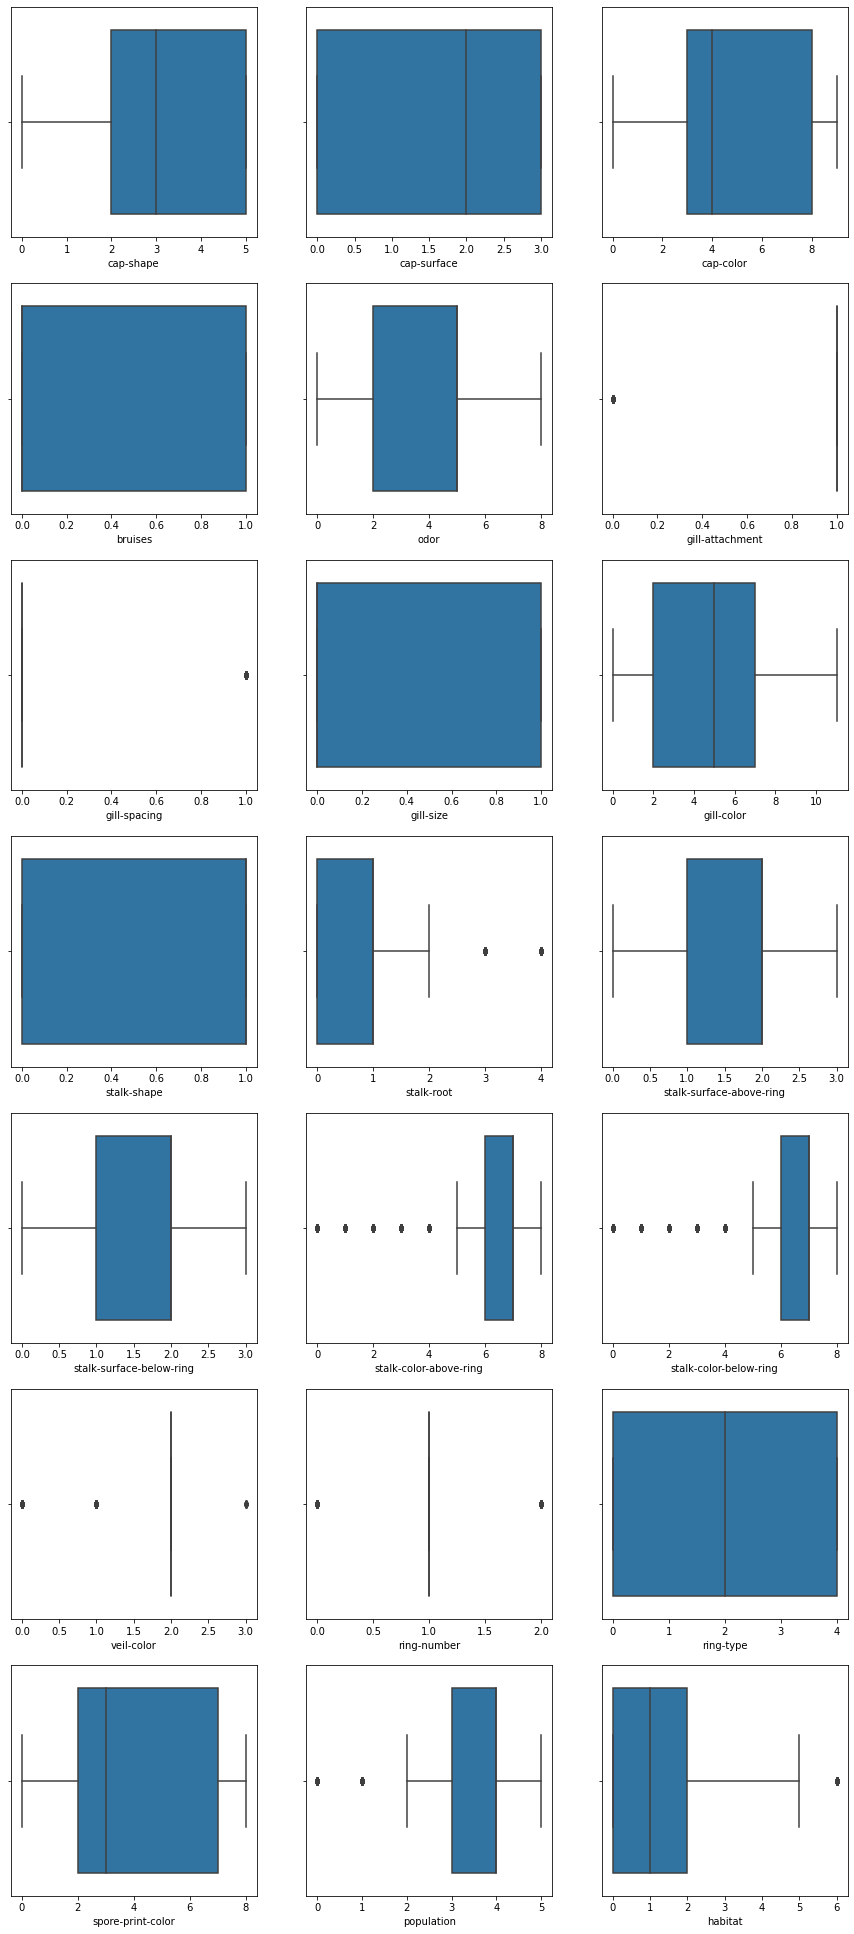

In [20]:
plt.figure(figsize=(15,50))
graph=1

for column in x:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(x[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
    
plt.show()

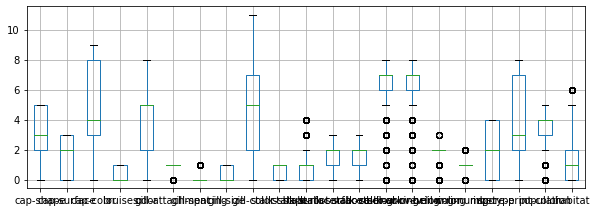

In [21]:
x.boxplot(figsize=[10,4])
plt.subplots_adjust(bottom=0.25)
plt.show()

Dots represent those who ate a lot more than normal or a lot less than normal (outliers).

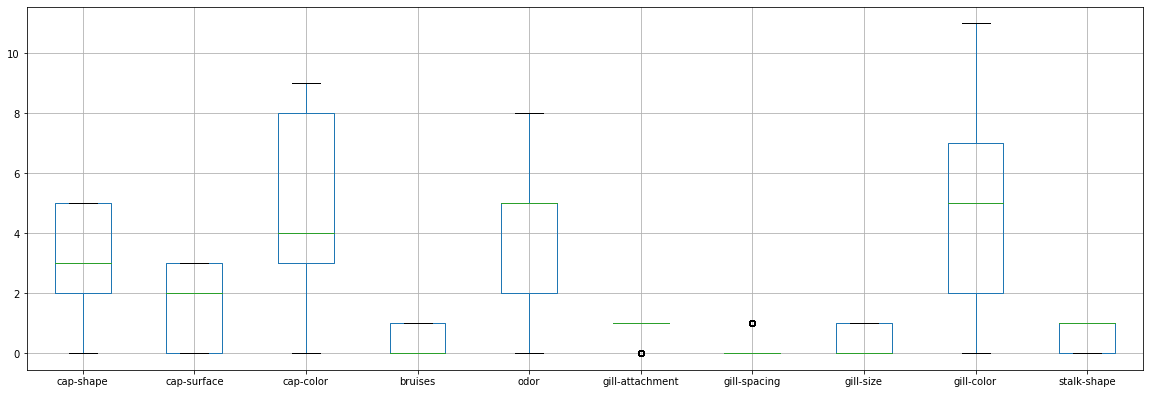

In [22]:
x.iloc[:,0:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

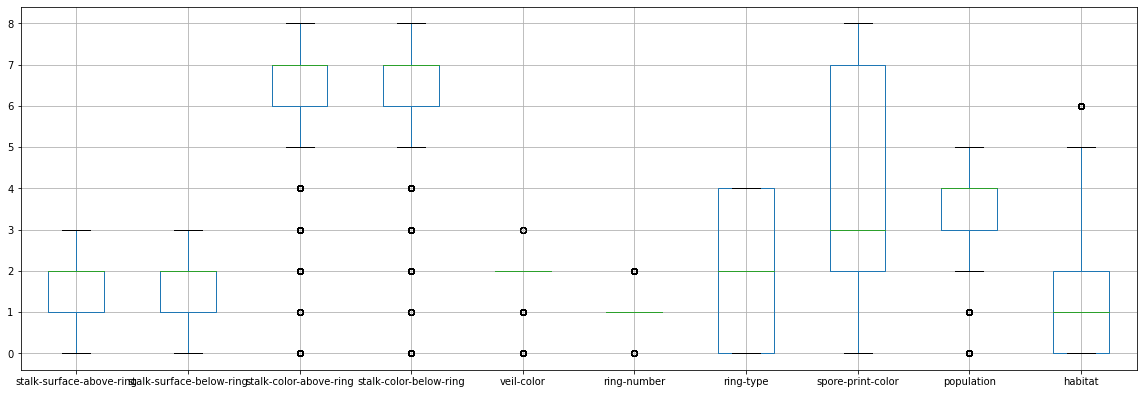

In [23]:
x.iloc[:,11:21].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

The dots are outliers which we need to remove

# Dealing with outliers

In [24]:
x.skew()

cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [25]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

df_new.skew()

cap-shape                  -0.205860
cap-surface                -0.473764
cap-color                   0.004059
bruises                     0.342750
odor                       -0.144660
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                 -0.246738
stalk-shape                -0.271345
stalk-root                  0.023182
stalk-surface-above-ring   -0.438332
stalk-surface-below-ring   -0.114150
stalk-color-above-ring     -0.964471
stalk-color-below-ring     -0.925320
veil-color                  5.797741
ring-number                -0.499098
ring-type                  -0.339232
spore-print-color           0.018174
population                 -0.368219
habitat                     0.123132
dtype: float64

In [26]:
x=df_new


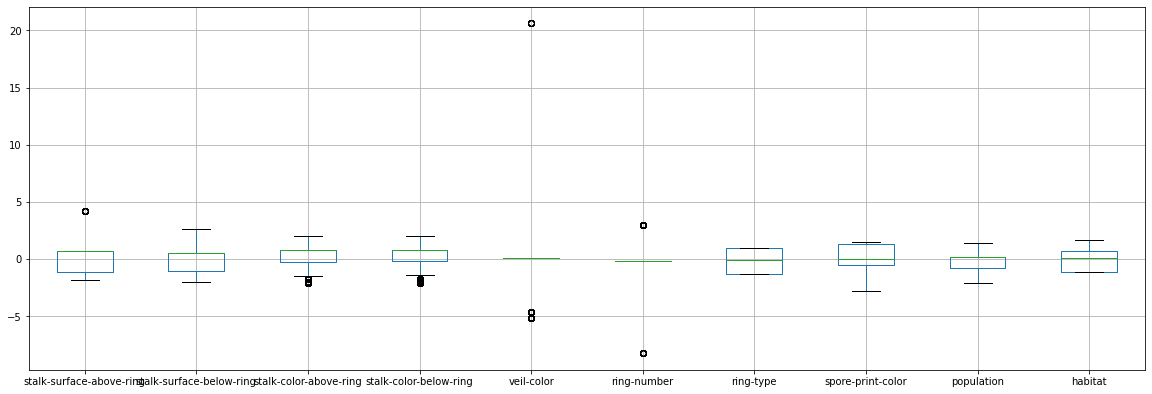

In [27]:
x.iloc[:,11:21].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

skewness removed through power transform

# scaling

In [28]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

# splitting the data and training it

In [29]:
#splitting the data into train and test
x_train, x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=10)

In [30]:
y_train.head()

6294    1
6606    1
7339    1
2618    0
2311    0
Name: class, dtype: int32

# Finding best random state

In [31]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is", maxAccu,"on Random State",maxRS)

Best accuracy is 0.9620876415558838 on Random State 180


We found best random_state value as 137.We will create our train_test split using the random_state(180)

# Testing various models

In [32]:
  x_train, x_test,y_train, y_test=train_test_split(x_scaled,y,test_size=.25,random_state=maxRS)

In [33]:
from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.9620876415558838
[[1021   36]
 [  41  933]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1057
           1       0.96      0.96      0.96       974

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031



In [34]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

1.0
[[1057    0]
 [   0  974]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1057
           1       1.00      1.00      1.00       974

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [35]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[1057    0]
 [   0  974]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1057
           1       1.00      1.00      1.00       974

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [36]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

ad_pred=svc.predict(x_test)

print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.9985228951255539
[[1054    3]
 [   0  974]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1057
           1       1.00      1.00      1.00       974

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



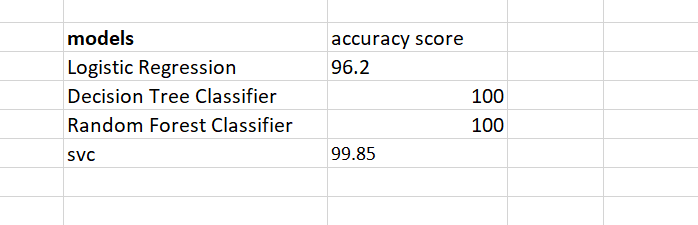

# Finding overfitting

In [1]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

NameError: name 'LR' is not defined

In [38]:
scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :", scr.mean())

Cross validation score of Decision Tree model : 0.9197192876089428


In [39]:
scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr.mean())

Cross validation score of Random Forest model : 0.8864726032588102


In [40]:
scr=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of SVC model : 0.8638184918529745


least difference between model accuracy and cross validation score is the best model

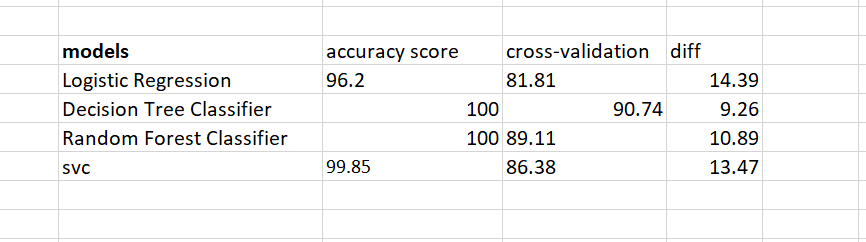

Decision Tree Classifier is the best model among the four

In [41]:
data.to_csv('fileLogistic.csv', index=False)

# HyperParameter tuning

In [42]:
from sklearn.model_selection import GridSearchCV 


In [43]:
#Decision Tree CLassifier
paramters={'criterion':['gini', 'entropy'],
           'splitter':['best', 'random'],
           'min_samples_split':[2,3,4,5,6,7],
           'min_samples_leaf':[2,3,4,5,6,7,8,9],
           'max_leaf_nodes':[2,3,4,5,10,20,30,40],
}

In [44]:
GCV=GridSearchCV(DecisionTreeClassifier(),paramters,cv=5)

In [45]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 10, 20, 30, 40],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']})

In [2]:
GCV.best_params_

NameError: name 'GCV' is not defined

In [47]:
mod=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=20,min_samples_leaf=2,min_samples_split=6,splitter='random')

In [48]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

99.85228951255539


# Saving of model

In [49]:
decision_tree_model=DecisionTreeClassifier()
decision_tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
filename='finalized_model.pickle'
pickle.dump(decision_tree_model,open(filename,'wb'))

# Prediction

In [51]:
#prediction using the saved model
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict(scaler.transform([[0,2,8,1,0,1,0,0,2,0,2,2,2,7,7,2,1,4,2,2,3]]))

NameError: name 'scaler' is not defined

# Adjusted R2

In [ ]:
decision_tree_model.score(x_train,y_train)

In [ ]:
y_pred=decision_tree_model.predict(x_test)

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs model predicted')
plt.show()

# Model evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
y_predict=decision_tree_model.predict(x_test)

In [ ]:
mean_absolute_error(y_test,y_pred)

In [ ]:
mean_squared_error(y_test,y_pred)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

# Regularisation

In [ ]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [ ]:
lasscv=LassoCV(alphas=None, max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

In [ ]:
#best alpha parameter
alpha=lasscv.alpha_
alpha

In [ ]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

In [ ]:
lasso_reg.score(x_test,y_test)